In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
journeys = pd.read_excel('tube-passenger-journeys.xlsx')

In [3]:
journeys

,Passenger Journeys ('000),2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12
0,Bakerloo,94243.0,96670.40,89101.80,96451.30,97807.6,101249.0,98863.2,104122.0,111136.0
1,Central,176144.0,184519.00,185091.00,205765.00,221687.0,229904.0,222247.0,237497.0,260916.0
2,Waterloo & City,10196.4,9680.16,9238.07,5516.61,10135.5,11253.5,11059.9,13178.2,15891.5
3,Circle & Ham,107080.0,108147.00,102174.00,112712.00,113255.0,120854.0,114342.0,106388.0,114609.0
4,District,176563.0,181029.00,173618.00,192112.00,196565.0,198548.0,187469.0,195339.0,208317.0
5,Jubilee,137180.0,144938.00,147675.00,167693.00,182056.0,179180.0,173571.0,185205.0,213554.0
6,Metropolitan,53221.4,53307.40,52982.10,59654.90,63696.0,65295.0,60006.7,62555.3,66779.4
7,Northern,199717.0,205566.00,195777.00,212851.00,228069.0,236039.0,232007.0,237422.0,252310.0
8,Piccadilly,173165.0,176102.00,166685.00,187105.00,194825.0,191891.0,187538.0,194811.0,210169.0
9,Victoria,160045.0,164809.00,163036.00,173040.00,178976.0,179543.0,172984.0,175936.0,199988.0


In [4]:
new_columns = journeys.columns.values
new_columns[0] = 'journeys_000s'
journeys.columns = new_columns
journeys.set_index('journeys_000s', drop=True, inplace=True)

In [5]:
journeys = journeys.T

In [65]:
journeys['year'] = np.arange(1, 10)
journeys.rename(columns={'Circle & Ham': 'Circle / H&C'}, inplace=True)
journeys

journeys_000s,Central,Northern,Jubilee,Piccadilly,District,Victoria,Circle / H&C,Bakerloo,Metropolitan,Waterloo & City,year
2003/04,176144.0,199717.0,137180.0,173165.0,176563.0,160045.0,107080.0,94243.0,53221.4,10196.40,1
2004/05,184519.0,205566.0,144938.0,176102.0,181029.0,164809.0,108147.0,96670.4,53307.4,9680.16,2
2005/06,185091.0,195777.0,147675.0,166685.0,173618.0,163036.0,102174.0,89101.8,52982.1,9238.07,3
2006/07,205765.0,212851.0,167693.0,187105.0,192112.0,173040.0,112712.0,96451.3,59654.9,5516.61,4
2007/08,221687.0,228069.0,182056.0,194825.0,196565.0,178976.0,113255.0,97807.6,63696.0,10135.50,5
2008/09,229904.0,236039.0,179180.0,191891.0,198548.0,179543.0,120854.0,101249.0,65295.0,11253.50,6
2009/10,222247.0,232007.0,173571.0,187538.0,187469.0,172984.0,114342.0,98863.2,60006.7,11059.90,7
2010/11,237497.0,237422.0,185205.0,194811.0,195339.0,175936.0,106388.0,104122.0,62555.3,13178.20,8
2011/12,260916.0,252310.0,213554.0,210169.0,208317.0,199988.0,114609.0,111136.0,66779.4,15891.50,9


In [7]:
cols = journeys.columns.tolist()
cols

['Bakerloo',
 'Central',
 'Waterloo & City',
 'Circle & Ham',
 'District',
 'Jubilee',
 'Metropolitan',
 'Northern',
 'Piccadilly',
 'Victoria',
 'year']

In [8]:
new_col_order = list([cols[1],  cols[7], cols[5], cols[8], cols[4], cols[9], cols[3], cols[0], cols[6], cols[2], cols[10]])

In [9]:
new_col_order

['Central',
 'Northern',
 'Jubilee',
 'Piccadilly',
 'District',
 'Victoria',
 'Circle & Ham',
 'Bakerloo',
 'Metropolitan',
 'Waterloo & City',
 'year']

In [10]:
journeys = journeys[new_col_order]
journeys

journeys_000s,Central,Northern,Jubilee,Piccadilly,District,Victoria,Circle & Ham,Bakerloo,Metropolitan,Waterloo & City,year
2003/04,176144.0,199717.0,137180.0,173165.0,176563.0,160045.0,107080.0,94243.0,53221.4,10196.40,1
2004/05,184519.0,205566.0,144938.0,176102.0,181029.0,164809.0,108147.0,96670.4,53307.4,9680.16,2
2005/06,185091.0,195777.0,147675.0,166685.0,173618.0,163036.0,102174.0,89101.8,52982.1,9238.07,3
2006/07,205765.0,212851.0,167693.0,187105.0,192112.0,173040.0,112712.0,96451.3,59654.9,5516.61,4
2007/08,221687.0,228069.0,182056.0,194825.0,196565.0,178976.0,113255.0,97807.6,63696.0,10135.50,5
2008/09,229904.0,236039.0,179180.0,191891.0,198548.0,179543.0,120854.0,101249.0,65295.0,11253.50,6
2009/10,222247.0,232007.0,173571.0,187538.0,187469.0,172984.0,114342.0,98863.2,60006.7,11059.90,7
2010/11,237497.0,237422.0,185205.0,194811.0,195339.0,175936.0,106388.0,104122.0,62555.3,13178.20,8
2011/12,260916.0,252310.0,213554.0,210169.0,208317.0,199988.0,114609.0,111136.0,66779.4,15891.50,9


In [11]:
journeys.iloc[1, 0]

184519.0

In [12]:
tick_names = journeys.index.values
tick_names = np.concatenate((tick_names, ['2012/13', '2013/14', '2014/15', '2015/16', '2017/18', '2018/19']))
tick_names

array(['2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09',
       '2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15',
       '2015/16', '2017/18', '2018/19'], dtype=object)

In [13]:
colors = ['red', 'black', 'silver', 'mediumblue', 'green', 'deepskyblue', 'gold', 'sienna', 'mediumvioletred', 'paleturquoise']

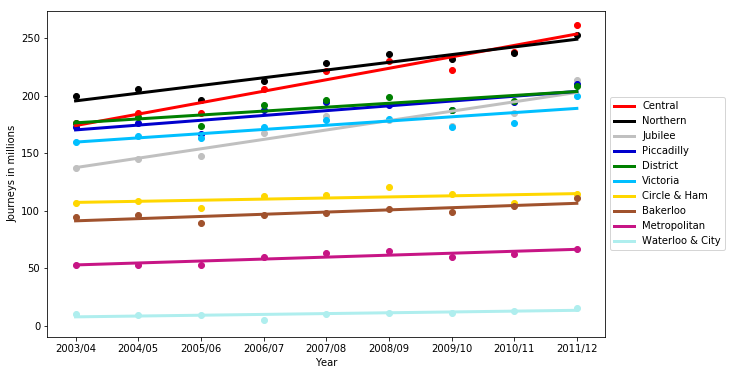

In [14]:
plt.figure(figsize=(10, 6))

for col in np.arange(0, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3)
    plt.xticks(np.arange(1,10), journeys.index)
plt.xlabel('Year')
plt.ylabel('Journeys in millions')
plt.legend(journeys.columns[0:10], loc='upper left', bbox_to_anchor=(1, 0.75))
plt.show()

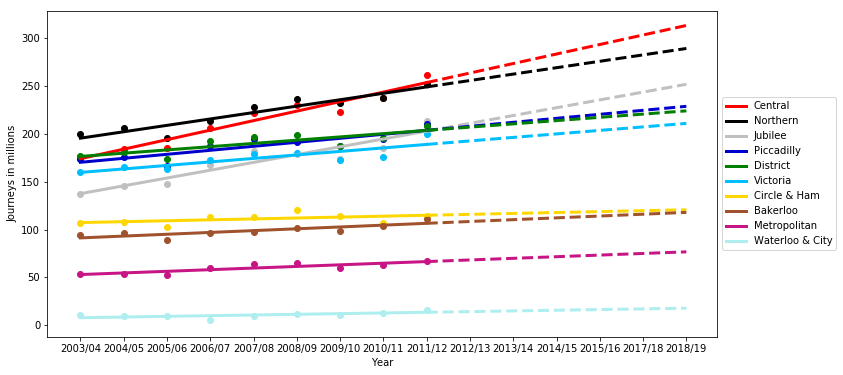

In [15]:
plt.figure(figsize=(12, 6))

for col in np.arange(0, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3)
    plt.xticks(np.arange(1,16), tick_names)
for col in np.arange(0, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    plt.plot(x2, regr.predict(x2), color=colors[col], linestyle='dashed', linewidth=3)
    plt.xticks(np.arange(1,16), tick_names)
plt.xlabel('Year')
plt.ylabel('Journeys in millions')
plt.legend(journeys.columns[0:10], loc='upper left', bbox_to_anchor=(1, 0.75))
plt.show()

In [16]:
labels_test = journeys.columns.values.copy()

labels_test = labels_test[0:10]
type(labels_test)

numpy.ndarray

In [17]:
test = [1, 2, 3]
test2 = [4, 5, 6]
test + test2

[1, 2, 3, 4, 5, 6]

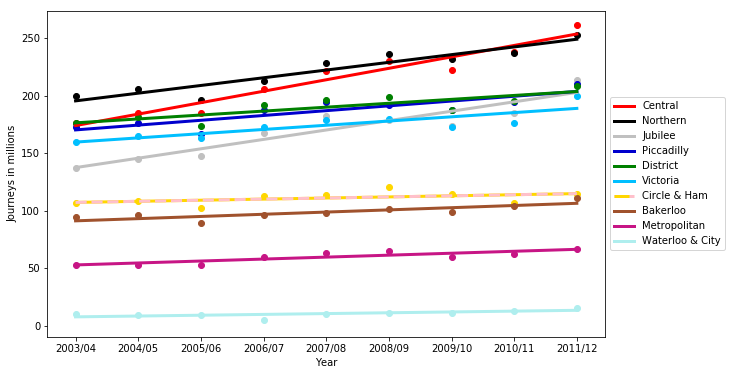

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

for col in np.arange(0, 6):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys.columns[col])
    plt.xticks(np.arange(1,10), journeys.index)
for col in np.arange(6, 7):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color='gold', linewidth=3, linestyle='-', label=journeys.columns[col])
    plt.plot(x, regr.predict(x), color='pink', linewidth=3, linestyle='--', label=journeys.columns[col])
    dotted_line1 = lines.Line2D([], [], linewidth=3, linestyle="--", dashes=(10, 1), color='pink')
    dotted_line2 = lines.Line2D([], [], linewidth=3, linestyle='-', dashes=(5, 4), color='gold')
    plt.xticks(np.arange(1,10), journeys.index)
for col in np.arange(7, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys.columns[col])
    plt.xticks(np.arange(1,10), journeys.index)
plt.xlabel('Year')
plt.ylabel('Journeys in millions')
handles, labels = ax.get_legend_handles_labels()
plt.legend((handles[0:6] + [(dotted_line1, dotted_line2)] + handles[8:11]), (labels[0:6] + labels[7:11]), loc='upper left', bbox_to_anchor=(1, 0.75))
plt.show()

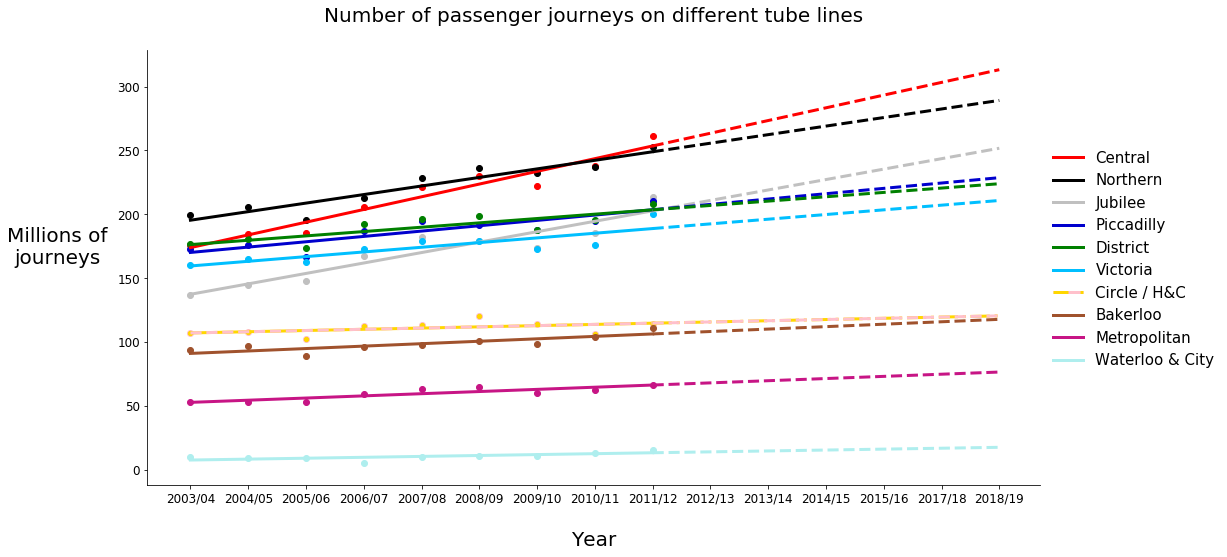

In [95]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(16, 8))

for col in np.arange(0, 6):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys.columns[col])
    plt.xticks(np.arange(1,16), tick_names)
for col in np.arange(6, 7):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color='pink')
    plt.scatter(x, y, s=18, color='gold')
    plt.plot(x, regr.predict(x), color='gold', linewidth=3, linestyle='-', label=journeys.columns[col])
    plt.plot(x, regr.predict(x), color='pink', linewidth=3, linestyle='--', label=journeys.columns[col])
    dotted_line1 = lines.Line2D([], [], linewidth=3, linestyle="--", dashes=(10, 1), color='pink')
    dotted_line2 = lines.Line2D([], [], linewidth=3, linestyle='-', dashes=(5, 4), color='gold')
    plt.xticks(np.arange(1,16), tick_names)
for col in np.arange(7, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    regr = LinearRegression()
    regr.fit(x, y)
    plt.scatter(x, y, color=colors[col])
    plt.plot(x, regr.predict(x), color=colors[col], linewidth=3, label=journeys.columns[col])
    plt.xticks(np.arange(1,16), tick_names)
for col in np.arange(0, 6):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    plt.plot(x2, regr.predict(x2), color=colors[col], linewidth=3, linestyle='dashed', label=journeys.columns[col])
    plt.xticks(np.arange(1,16), tick_names)
for col in np.arange(6, 7):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    plt.plot(x2, regr.predict(x2), color='gold', linewidth=3, linestyle='-.', label=journeys.columns[col])
    plt.plot(x2, regr.predict(x2), color='pink', linewidth=3, linestyle='--', label=journeys.columns[col])
    dotted_line3 = lines.Line2D([], [], linewidth=3, linestyle="--", dashes=(10, 1), color='pink')
    dotted_line4 = lines.Line2D([], [], linewidth=3, linestyle='-', dashes=(5, 4), color='gold')
    plt.xticks(np.arange(1,16), tick_names)
for col in np.arange(7, len(journeys.columns)-1):
    x = journeys['year'].values.reshape(-1, 1)
    y = journeys.iloc[:,col].values /1000
    x2 = np.array([9, 10, 11, 12, 13, 14, 15]).reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(x, y)
    plt.plot(x2, regr.predict(x2), color=colors[col], linewidth=3, linestyle='dashed', label=journeys.columns[col])
    plt.xticks(np.arange(1,16), tick_names)
plt.xlabel('\nYear', fontsize=20)
plt.ylabel('Millions of\njourneys', fontsize=20, rotation=0, labelpad=60)
handles, labels = ax.get_legend_handles_labels()
plt.legend((handles[0:6] + [(dotted_line1, dotted_line2)] + handles[8:11]),
           (labels[0:6] + labels[7:11]),
           loc='upper left',
           bbox_to_anchor=(1, 0.8),
          frameon=False,
          prop={'size': 15})
plt.title('Number of passenger journeys on different tube lines\n', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
df_graph = pd.DataFrame()

for col in np.arange(0, len(journeys.columns)-1):
    x = journeys['year'].values
    y = journeys.iloc[:,col].values
    df_temp = pd.DataFrame({'x':x, 'y':y, 'line': pd.Series([journeys.columns[col]]*len(x))})
    df_graph = pd.concat([df_graph, df_temp], ignore_index=True)

g = sns.FacetGrid(df_graph, hue='line', palette=colors, size=5);
g.map(plt.scatter, "x", "y", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.map(sns.regplot, "x", "y", ci=95, robust=1)
g.add_legend()
g.set_xticklabels(journeys.index);
